In [3]:
%pip install neurokit2 PyWavelets wfdb biosppy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

seek_mins = 120 # 跨过的分钟数
seek_bytes = seek_mins * 60 * 1000 + 1024
print(seek_bytes)

# Fetch test data
file_path = 'usercase1.lry'
with open(file_path, 'rb') as file:
    file.seek(seek_bytes) # 跨过头1024位以及seek_mins分钟的数据
    data = file.read()
num_samples = len(data) // 2
voltages = np.frombuffer(data, dtype=np.int16)[:num_samples] * (1 / 200)

# 取得前10秒的数据，每秒1000个数据点
sampling_rate = 1000  # 每毫秒一个数据点
duration = 5  # 取得的秒数
num_points = sampling_rate * duration
ecg_signal = voltages[:num_points]

7201024


In [23]:
# 使用NeuroKit2检测R波峰和其他波
neurokit2_rate=360
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=neurokit2_rate)
signals, waves = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=neurokit2_rate, method="dwt")

dict_keys(['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])


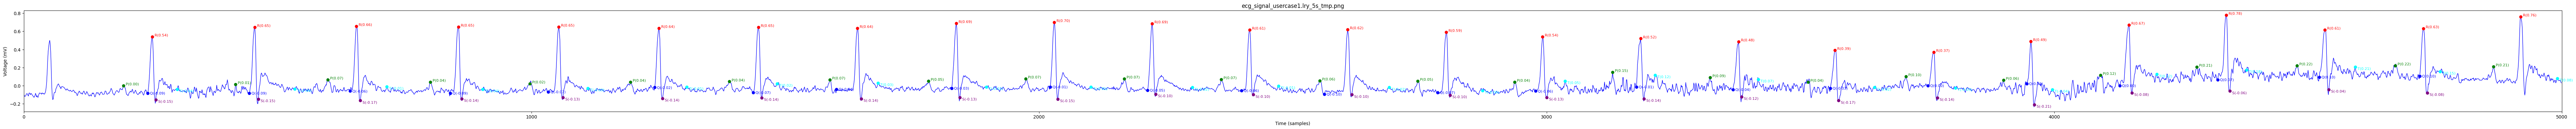

In [24]:
# 打印检测到的波峰类型
print(waves.keys())

# 绘制图像
plt.figure(figsize=(20 * duration, 4), dpi=100)  # 设置图形尺寸和分辨率
plt.plot(ecg_signal, label='ECG Signal', color='blue', linewidth=1.0)  # 调整线条颜色和粗细

# 设置x轴范围为数据长度
plt.xlim(0, len(ecg_signal))

# 设置y轴范围为-1到2
# plt.ylim(-1, 2)

# 检查并标记波峰
def plot_peaks(peaks, label, color, va, rotation):
    for peak in peaks:
        if 0 <= peak < len(ecg_signal):
            plt.plot(peak, ecg_signal[peak], 'o', color=color)  # 在波峰位置绘制点
            plt.text(peak, ecg_signal[peak], f'  {label}({ecg_signal[peak]:.2f})', color=color, fontsize=8, ha='left', va=va,rotation=rotation)

# 标记R波峰并添加标签
plot_peaks(rpeaks['ECG_R_Peaks'], 'R', 'red', 'bottom' ,0)

# 标记P波并添加标签
plot_peaks(waves['ECG_P_Peaks'], 'P', 'green', 'bottom' ,0)

# 标记Q波并添加标签
plot_peaks(waves['ECG_Q_Peaks'], 'Q', 'blue', 'center', 0)

# 标记S波并添加标签
plot_peaks(waves['ECG_S_Peaks'], 'S', 'purple', 'top' ,0)

# 标记T波并添加标签
plot_peaks(waves['ECG_T_Peaks'], 'T', 'cyan', 'top' ,0)

image_name = "ecg_signal_{}_{}s_tmp.png".format(file_path, duration)

# 设置图形标题和轴标签
plt.title(image_name)
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (mV)")
plt.grid(False)  # 不显示网格，以保持与提供图片一致

# 保存图像
plt.savefig(image_name, format='png', dpi=96)

# 显示图像
plt.show()